Plotting Discrete Sampling Geometry Data 
=====

Author: [Mike McCann](https://github.com/MBARIMike/)

The data used for this example are available through public OPeNDAP servers. Twenty years ago my go-to tool to make exploratory plots of these kind of data was [FERRET](https://ferret.pmel.noaa.gov/Ferret/). More and more xarray is now filling this need.

Discrete Sampling Geometry Data come from oceanographic observing platforms such as moorings, gliders, and autonomous underwater vehicles.

Additional packages you may need to `conda install`: `hvplot`, `geoviews`

In [1]:
%matplotlib inline
import xarray as xr

/Users/mccann/anaconda/envs/xarray-docs/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Timeseries
=====
Plot Shortwave radiation flux measurements from MBARI's M1 Mooring

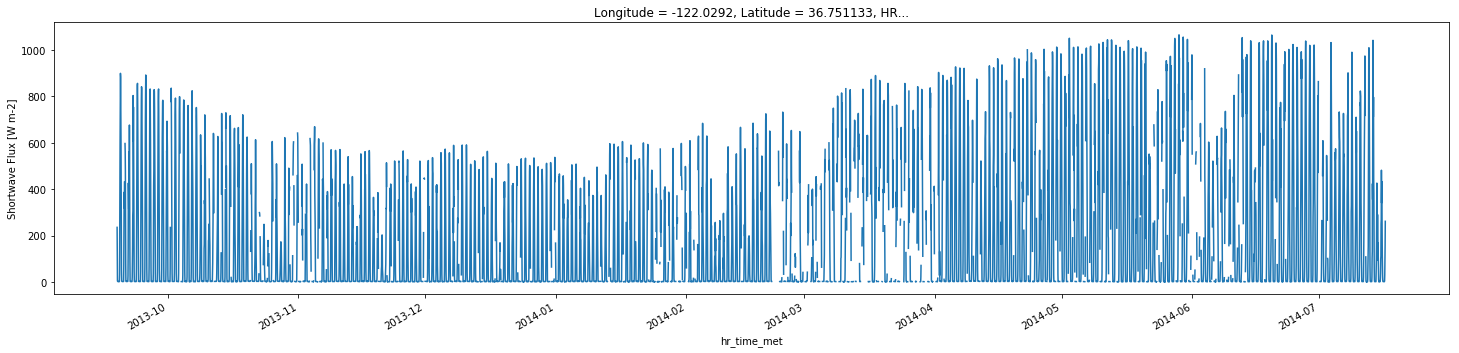

In [2]:
mooring_base_url = 'http://dods.mbari.org/opendap/data/ssdsdata/deployments/m1/201309/'
mooring = xr.open_dataset(mooring_base_url + 'OS_M1_20130918hourly_CMSTV.nc')
mooring.SW_FLUX_HR.plot(aspect=5, size=5)

TimeseriesProfile
=====
Plot Temperature from a string of CTD instruments on MBARI's M1 Mooring

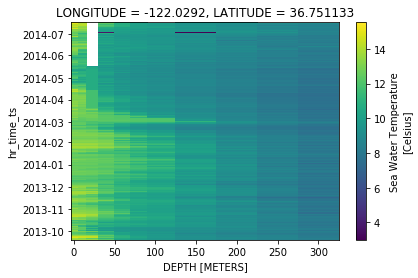

In [3]:
# Initial plot with default axes (this needs to be done first to prevent the next cell from hanging)
mooring.SEA_WATER_TEMPERATURE_HR.plot()

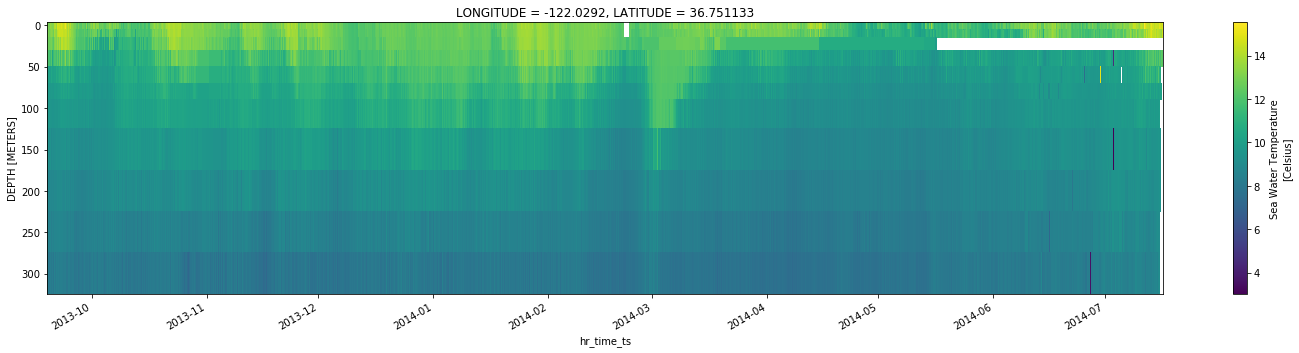

In [4]:
# Rearrange the axes to how we typically plot these data
mooring.SEA_WATER_TEMPERATURE_HR.plot(x='hr_time_ts', y='DEPTH', aspect=5, size=5, yincrease=False)

Trajectory
=====
Plot time series of pitch data from one of MBARI's Dorado AUV deployments

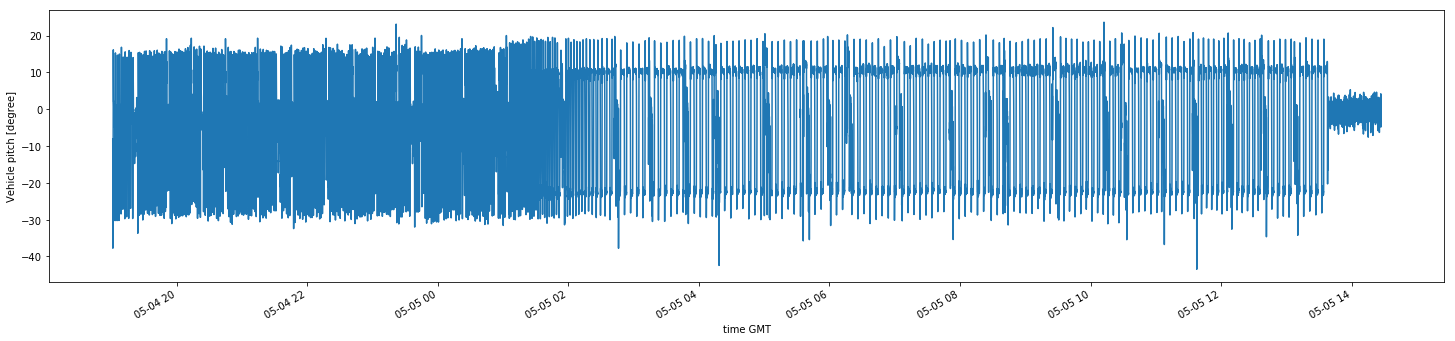

In [5]:
auv_base_url = 'http://dods.mbari.org/opendap/data/auvctd/surveys/2009/netcdf/'
auv = xr.open_dataset(auv_base_url + 'Dorado389_2009_124_03_124_03_decim.nc')
auv.pitch.plot(aspect=5, size=5)

To easily plot trajectory data on a map we need to convert our xarray Dataset to a Pandas DataFrame, and then use hvplot.

In [6]:
import hvplot.pandas
import geoviews as gv
auv_df = auv.to_dataframe()
auv_df.hvplot.points(x='longitude', y='latitude', c='depth', geo=True) * gv.tile_sources.OSM

:Overlay
   .Points.I :Points   [longitude,latitude]   (depth)
   .WMTS.I   :WMTS   [Longitude,Latitude]